In [180]:
# Importing needed libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')
# %matplotlib inline

In [181]:
# Importing and loading data
data = pd.read_csv("C:/Users/Idris/OneDrive/Documents/Azure DS/wine.csv")
data.head()

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Alcohol                     178 non-null    float64
 1   Malic_acid                  178 non-null    float64
 2   Ash                         178 non-null    float64
 3   Alcalinity                  178 non-null    float64
 4   Magnesium                   178 non-null    int64  
 5   Phenols                     178 non-null    float64
 6   Flavanoids                  178 non-null    float64
 7   Nonflavanoids               178 non-null    float64
 8   Proanthocyanins             178 non-null    float64
 9   Color_intensity             178 non-null    float64
 10  Hue                         178 non-null    float64
 11  OD280_315_of_diluted_wines  178 non-null    float64
 12  Proline                     178 non-null    int64  
 13  WineVariety                 178 non

In [183]:
data.describe()

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [184]:
data.shape

(178, 14)

In [185]:
data.isnull().sum()

Alcohol                       0
Malic_acid                    0
Ash                           0
Alcalinity                    0
Magnesium                     0
Phenols                       0
Flavanoids                    0
Nonflavanoids                 0
Proanthocyanins               0
Color_intensity               0
Hue                           0
OD280_315_of_diluted_wines    0
Proline                       0
WineVariety                   0
dtype: int64

Lets Identify the Numerical and Categorical Variables

In [186]:
# numerical columns
num_col = data.select_dtypes("number").drop("WineVariety", axis = 1).columns
num_col

Index(['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color_intensity',
       'Hue', 'OD280_315_of_diluted_wines', 'Proline'],
      dtype='object')

In [187]:
# Categorical Columns
cat_col = data.select_dtypes("object").columns
cat_col

Index([], dtype='object')

In [188]:
# Label clases

wine_classes = ["variety A", "variety B", "variety C"]

Lets see the distribution of each numeric feature

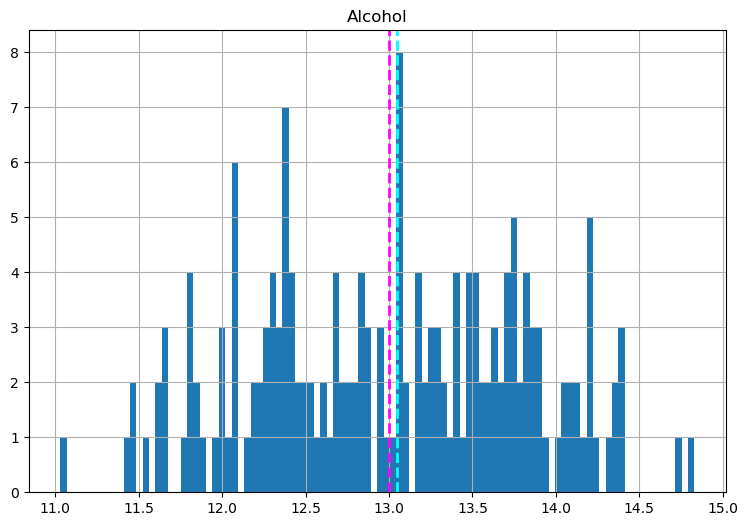

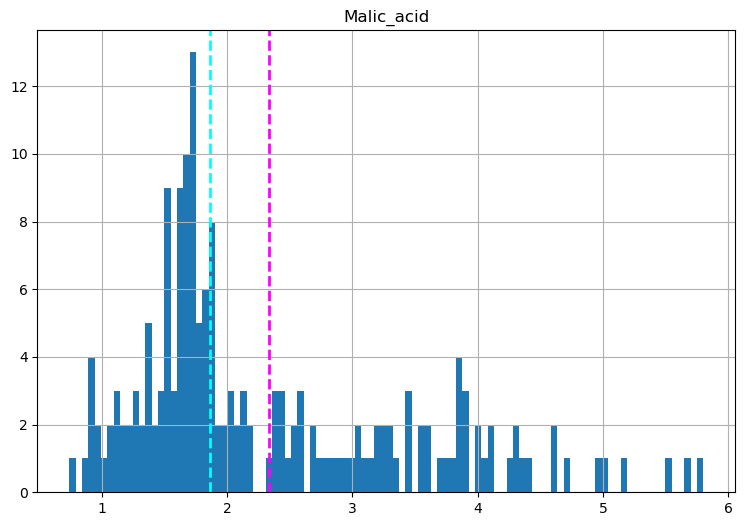

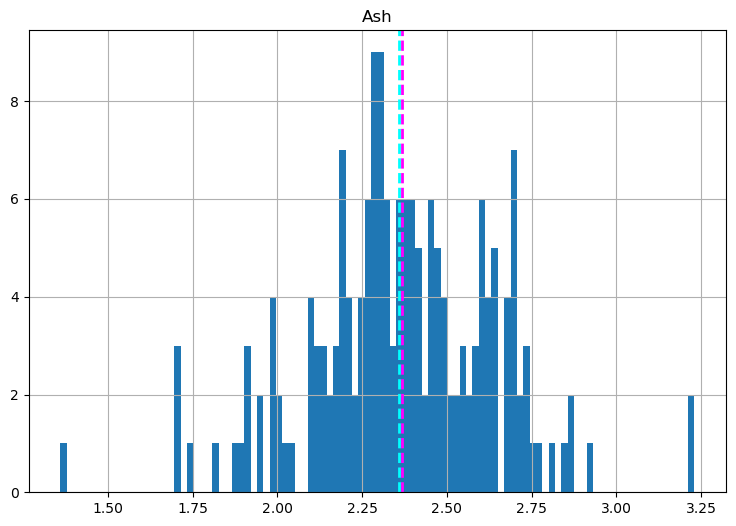

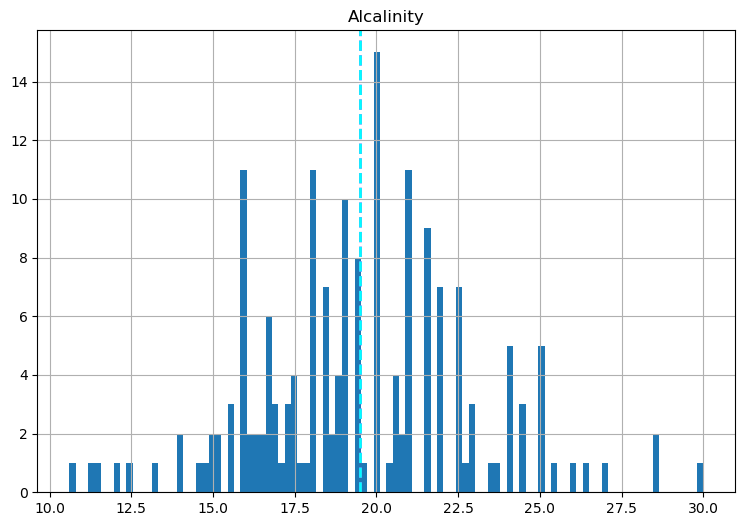

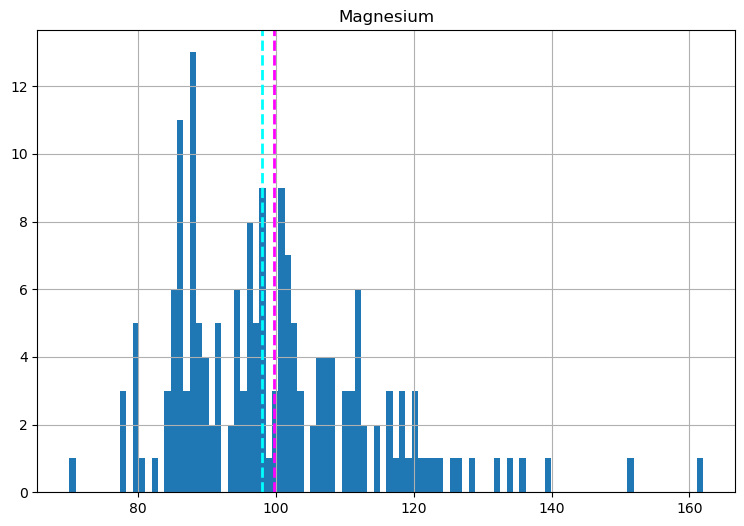

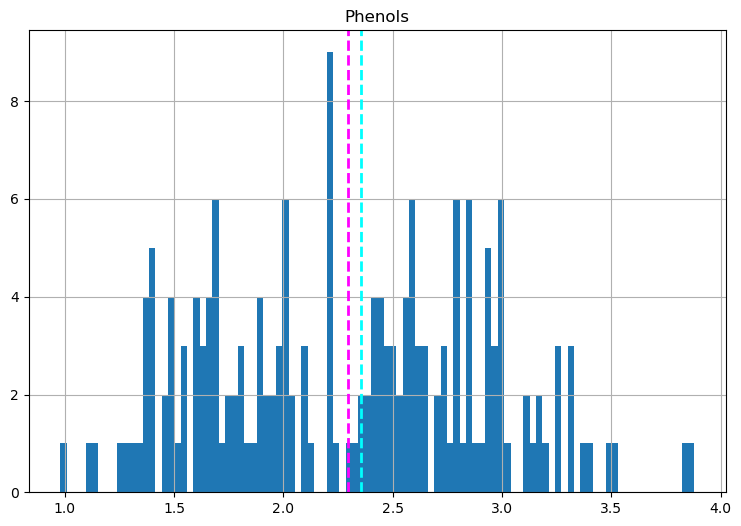

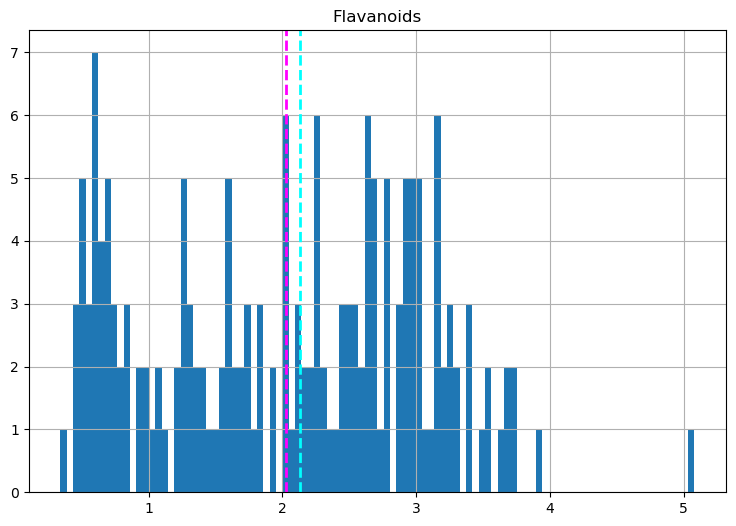

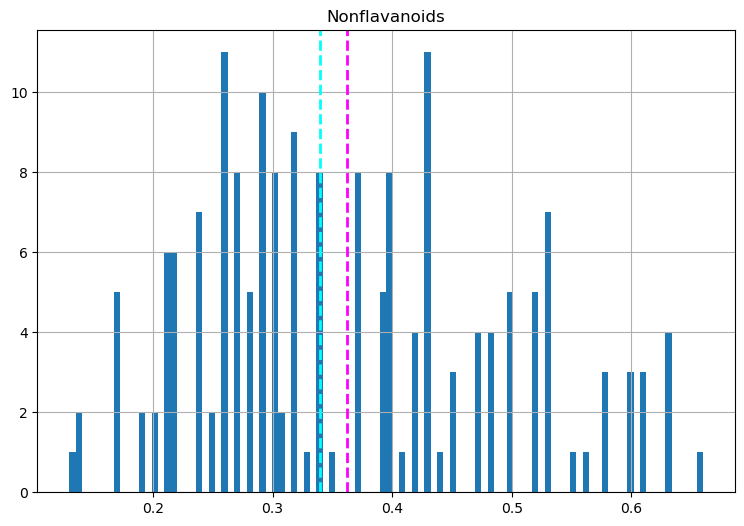

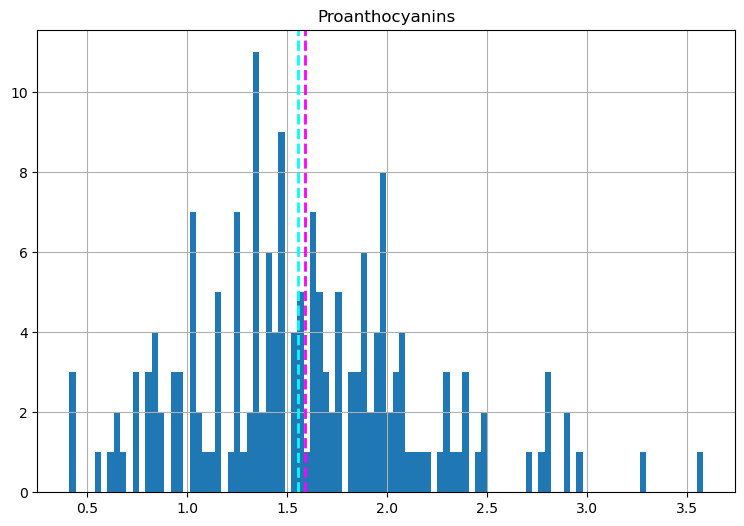

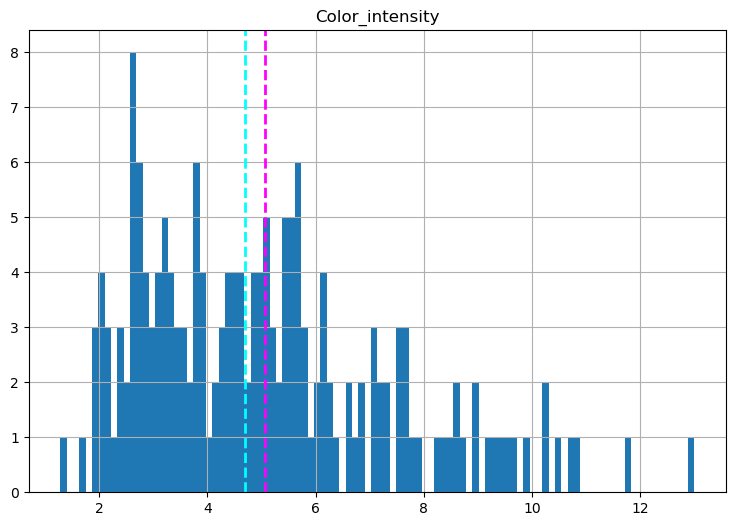

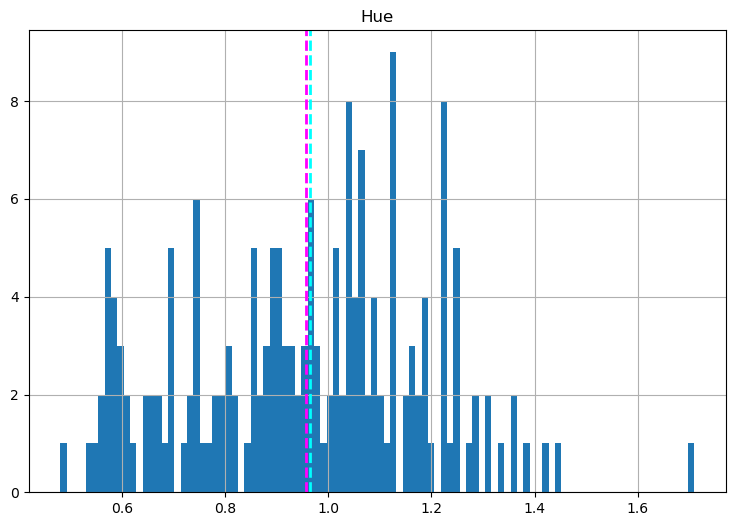

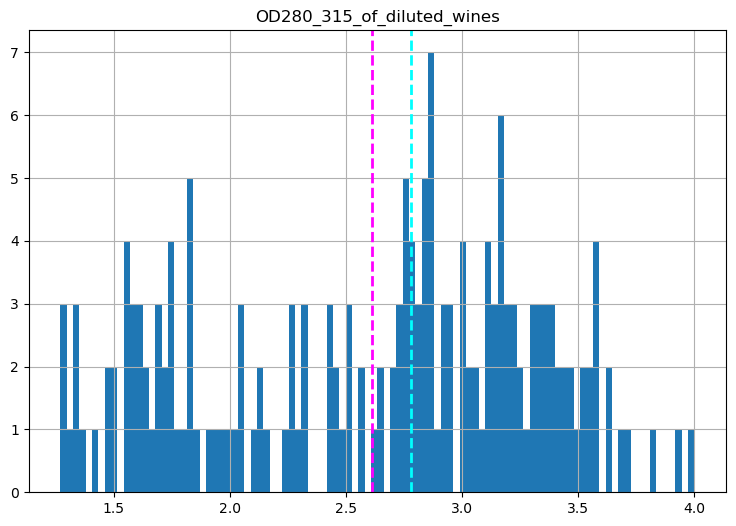

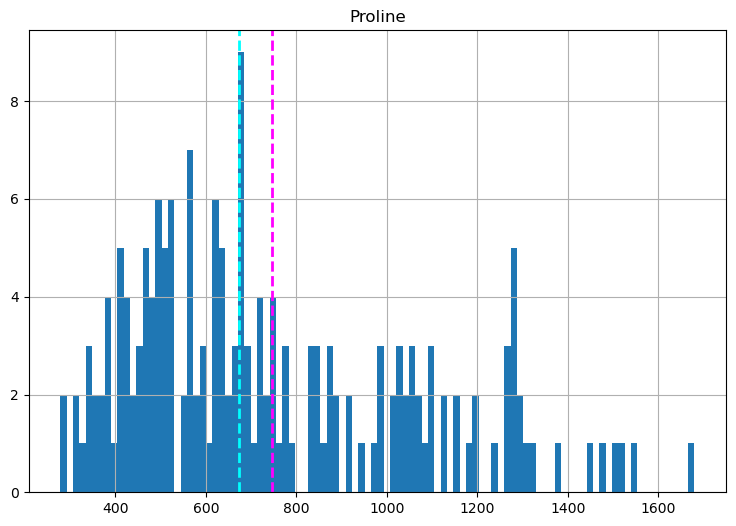

In [189]:
# Plot a histogram for each numeric feature
for col in num_col:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

Now let's compare the feature distributions for each label value.

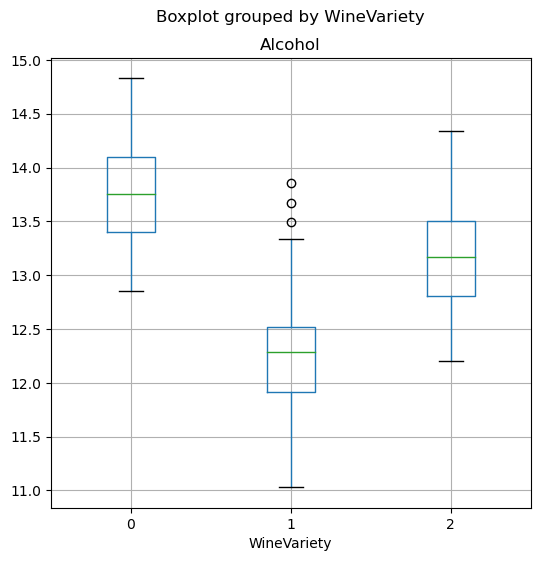

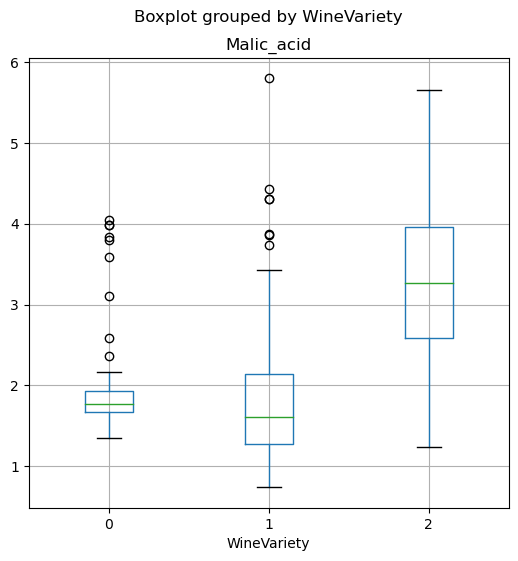

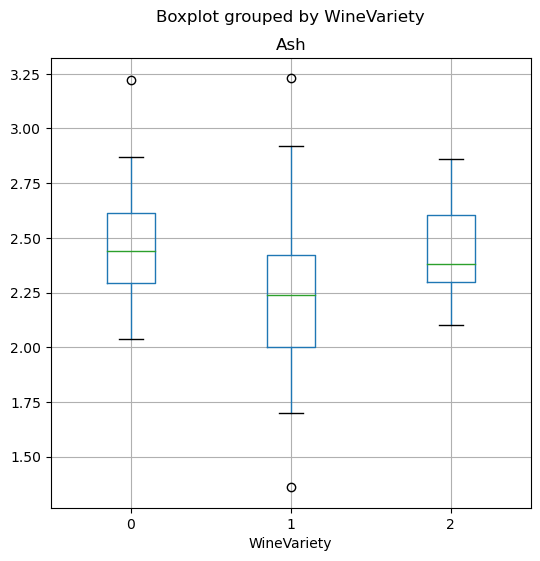

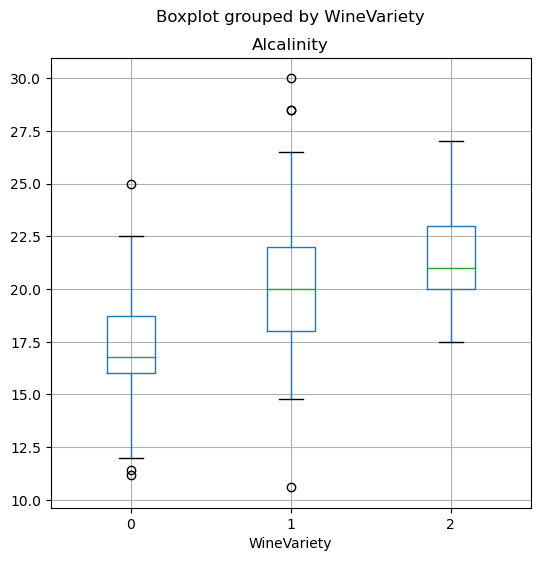

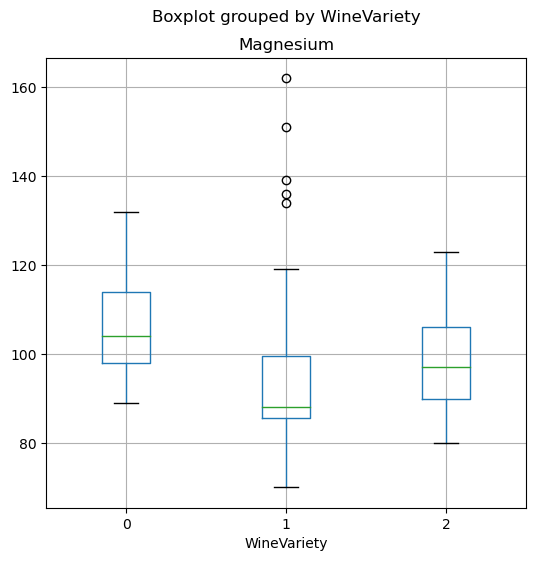

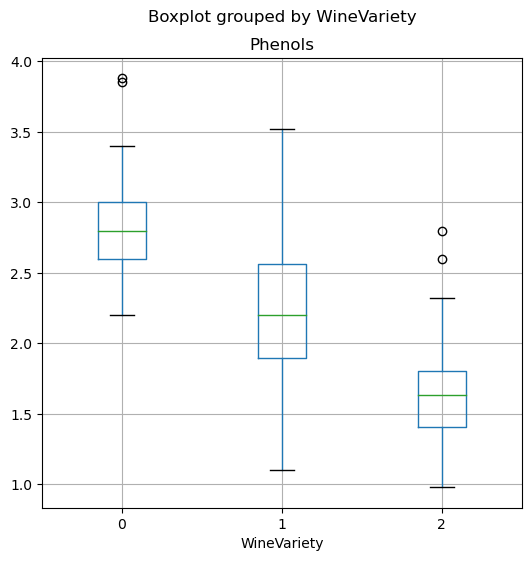

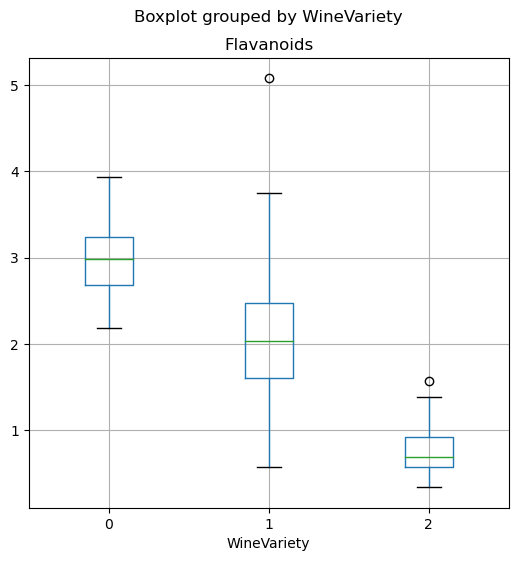

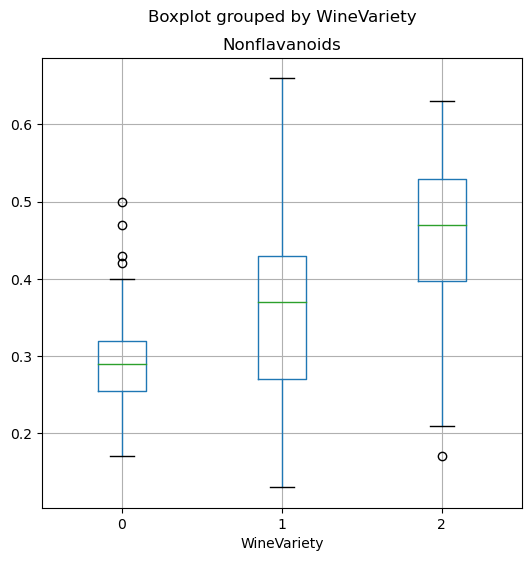

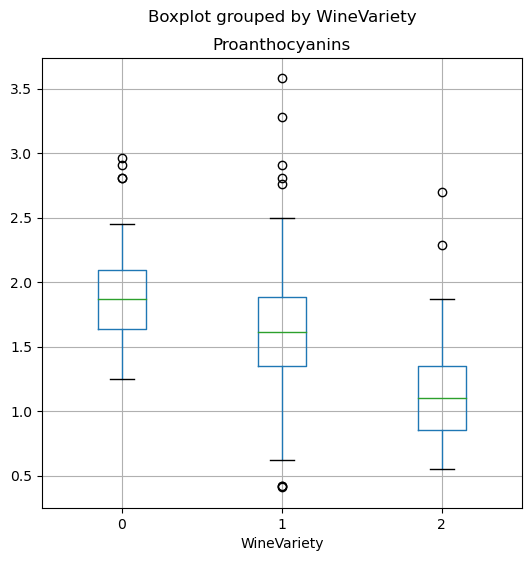

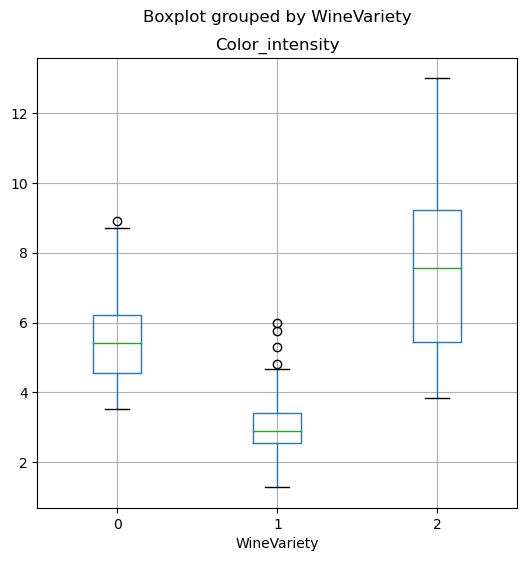

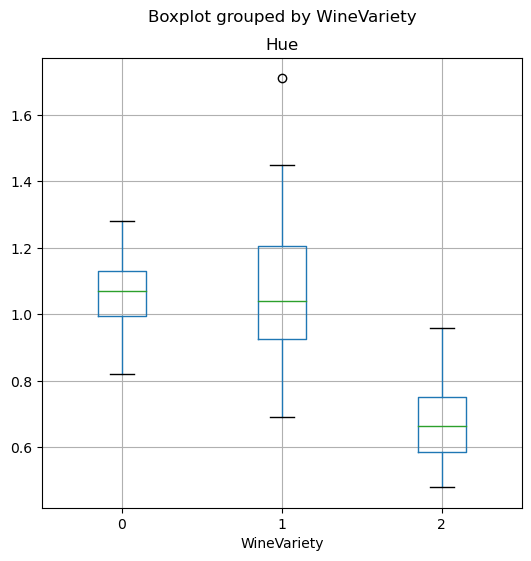

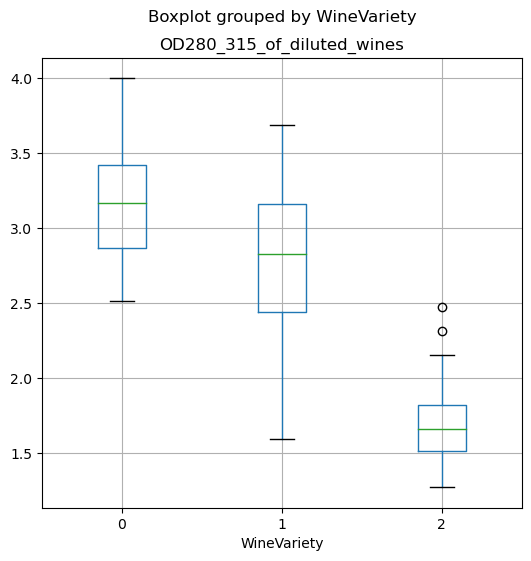

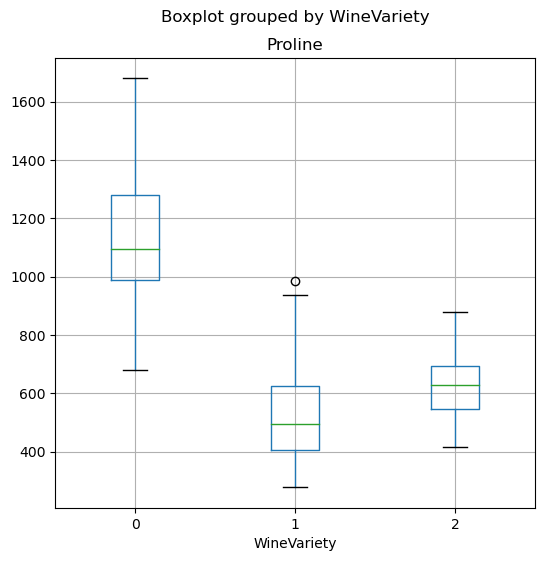

In [190]:
features = data.drop("WineVariety", axis = 1).columns
for col in features:
    data.boxplot(column=col, by='WineVariety', figsize=(6,6))
    plt.title(col)
plt.show()

There is notable difference in most features such as: Alcohol, flavanoids, Nonflavanoids, etc. These features will help predict the wine category.

## Split Data

In [191]:
target = "WineVariety"
X = data[features]
y = data[target]

In [192]:
# Split data into train and tests
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state= 0)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 124 rows
Test Set: 54 rows


### Build Models 

Lets start with Logistic Classification model

In [193]:
# Define preprocessing for numeric columns (scale them)
numeric_features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
reg = 0.01
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])


# Create Preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features)
    ])

# Create Preprocessing and training pipeline
model = Pipeline(steps= [
    ("preprocessor", preprocessor),
    ("regressor", LogisticRegression(C=1/reg, solver="lbfgs", multi_class='auto', max_iter=10000))
     ])

In [194]:
# Set regularization rate
reg = 0.01

# # train a logistic regression model on the training set
# model = LogisticRegression(C=1/reg, solver="lbfgs", multi_class='auto', max_iter=10000).fit(X_train, y_train)
# print (model)

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11])])),
                ('regressor', LogisticRegression(C=100.0, max_iter=10000))])

In [195]:
predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:' ,y_test)

Predicted labels:  [0 2 1 0 1 0 0 2 1 1 2 2 0 1 2 1 0 0 1 0 0 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1 0 2 1 2 0 2 2 0 2]
Actual labels: 54     0
151    2
63     1
55     0
123    1
121    1
7      0
160    2
106    1
90     1
141    2
146    2
5      0
98     1
168    2
80     1
33     0
18     0
61     1
51     0
66     1
37     0
4      0
104    1
60     1
111    1
126    1
86     1
112    1
164    2
26     0
56     0
129    1
45     0
8      0
44     0
161    2
92     1
94     1
174    2
24     0
30     0
93     1
101    1
113    1
19     0
135    2
74     1
144    2
16     0
131    2
138    2
40     0
158    2
Name: WineVariety, dtype: int64


In [196]:
print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.9629629629629629


In [197]:
print(classification_report(y_test, predictions))

# Precision: Of the predictions the model made for this class, what proportion were correct?
# Recall: Out of all of the instances of this class in the test dataset, how many did the model identify?
# F1-Score: An average metric that takes both precision and recall into account.
# Support: How many instances of this class are there in the test dataset?

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      0.91      0.95        22
           2       1.00      1.00      1.00        13

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.97      0.96      0.96        54



In [198]:
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))

Overall Accuracy: 0.9629629629629629
Overall Precision: 0.9682539682539683
Overall Recall: 0.9696969696969697


In [199]:
# Print the confusion matrix
mcm = confusion_matrix(y_test, predictions)
print(mcm)

[[19  0  0]
 [ 2 20  0]
 [ 0  0 13]]


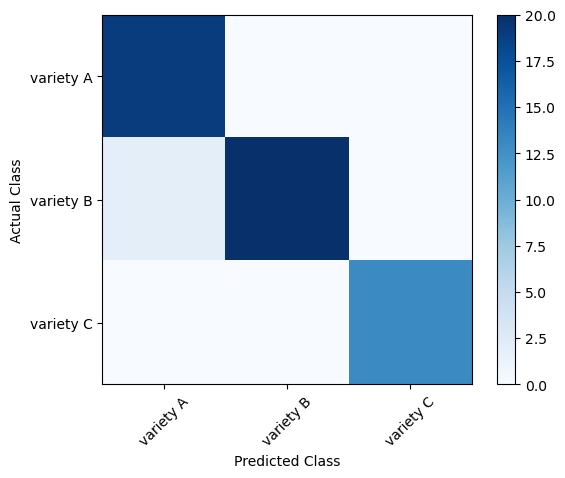

In [200]:
plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(wine_classes))
plt.xticks(tick_marks, wine_classes, rotation=45)
plt.yticks(tick_marks, wine_classes)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

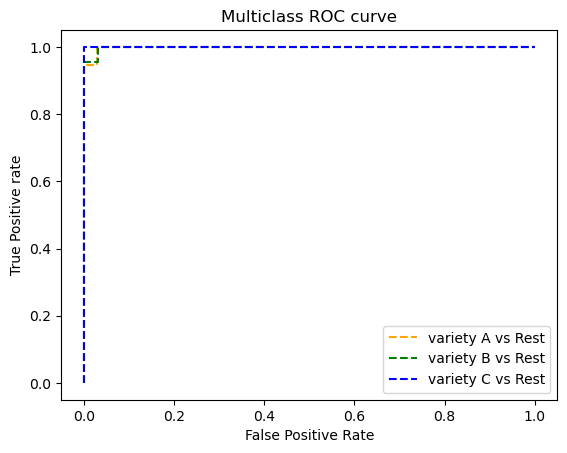

In [201]:
# Get class probability scores
wine_prob = model.predict_proba(X_test)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(wine_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, wine_prob[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label= wine_classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label= wine_classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label= wine_classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()


In [202]:
auc = roc_auc_score(y_test, wine_prob, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 0.9990252620186831


### Use Models

In [203]:
import joblib

# Save the model as a pickle file
filename = './penguin_model.pkl'
joblib.dump(model, filename)

['./penguin_model.pkl']

In [204]:
# Load the model from the file
model = joblib.load(filename)


In [205]:
# This time our input is an array of two feature arrays
x_new = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
         [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])
print ('New samples:\n{}'.format(x_new))

# Call the web service, passing the input data
predictions = model.predict(x_new)

# Get the predicted classes.
for prediction in predictions:
    print(prediction, '(' + wine_classes[prediction] +')')

New samples:
[[1.372e+01 1.430e+00 2.500e+00 1.670e+01 1.080e+02 3.400e+00 3.670e+00
  1.900e-01 2.040e+00 6.800e+00 8.900e-01 2.870e+00 1.285e+03]
 [1.237e+01 9.400e-01 1.360e+00 1.060e+01 8.800e+01 1.980e+00 5.700e-01
  2.800e-01 4.200e-01 1.950e+00 1.050e+00 1.820e+00 5.200e+02]]
0 (variety A)
1 (variety B)
